In [1]:
# Dependencies
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata
import seaborn as sns

In [11]:
pd.DataFrame(concatenated)

,lab_report_date,Cases_White,Cases_Black,Cases_LatinX,Cases_Unknown,Cases_Asian,Cases_Other,dataset,cases_total,cases_latinx,cases_asian_non_latinx,cases_black_non_latinx,cases_white_non_latinx,cases_other_non_latinx,cases_unknown_race_eth
0,2020-07-15 00:00:00,34463.0,26330.0,49483.0,36731.0,4373.0,5827.0,case_by_race_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-07-12 00:00:00,33468.0,25828.0,48999.0,36106.0,4317.0,5719.0,case_by_race_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-07-08 00:00:00,31974.0,25072.0,48116.0,34990.0,4249.0,5544.0,case_by_race_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-07-05 00:00:00,31143.0,24691.0,47679.0,34555.0,4209.0,5493.0,case_by_race_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-07-01 00:00:00,30175.0,24191.0,46832.0,32677.0,4163.0,5383.0,case_by_race_df,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,case2_by_race_df,3.0,0.0,0.0,2.0,1.0,0.0,0.0
140,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,case2_by_race_df,3.0,0.0,0.0,0.0,3.0,0.0,0.0
141,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,case2_by_race_df,1.0,0.0,0.0,1.0,0.0,0.0,0.0
142,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,case2_by_race_df,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [2]:
excel_data_df = pd.read_excel('ILCovid.xlsx')
ildf = pd.DataFrame(excel_data_df)
ildf.head()

,lab_report_date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Other,...,Deaths_Black,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
0,2020-07-15,IL,157825,34463,26330,49483,4373,228,390,5827,...,1998,1491,346,10,8,52,303,1491,5633,102
1,2020-07-12,IL,155048,33468,25828,48999,4317,226,385,5719,...,1990,1482,343,10,8,52,304,1482,5602,103
2,2020-07-08,IL,150554,31974,25072,48116,4249,225,384,5544,...,1967,1460,337,10,8,51,313,1460,5536,103
3,2020-07-05,IL,148373,31143,24691,47679,4209,224,379,5493,...,1958,1448,329,10,7,48,307,1448,5475,97
4,2020-07-01,IL,144013,30175,24191,46832,4163,219,373,5383,...,1934,1435,327,9,7,48,101,1435,5415,101


In [3]:
# Case by race dataframe
case_by_race_df = ildf[["lab_report_date",
                        "Cases_White",
                      "Cases_Black",
                        "Cases_LatinX",
                        "Cases_Unknown",
                      "Cases_Asian",
                       "Cases_Other",]]

# Clean the data by dropping empty row
case_by_race_df = case_by_race_df.dropna(how = "any")

In [4]:
client = Socrata("data.cityofchicago.org", None)
results = client.get("naz8-j4nc", limit=2000)
results_df = pd.DataFrame.from_records(results)
results_df.head()

,lab_report_date,cases_total,deaths_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,cases_age_50_59,cases_age_60_69,cases_age_70_79,...,deaths_unknown_age,deaths_female,deaths_male,deaths_unknown_gender,deaths_latinx,deaths_asian_non_latinx,deaths_black_non_latinx,deaths_white_non_latinx,deaths_other_non_latinx,deaths_unknown_race_eth
0,2020-07-24T00:00:00.000,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-07-23T00:00:00.000,43,0,2,10,15,3,6,2,4,...,0,0,0,0,0,0,0,0,0,0
2,2020-07-22T00:00:00.000,153,1,11,48,35,26,12,13,8,...,0,1,0,0,0,0,0,1,0,0
3,2020-07-21T00:00:00.000,178,0,12,48,36,36,19,12,6,...,0,0,0,0,0,0,0,0,0,0
4,2020-07-20T00:00:00.000,337,3,45,80,70,52,41,33,13,...,0,1,2,0,2,0,1,0,0,0


In [5]:
# Case by race dataframe
case2_by_race_df = results_df[["lab_report_date",
                      "cases_total",
                      "cases_latinx",
                      "cases_asian_non_latinx",
                      "cases_black_non_latinx",
                      "cases_white_non_latinx",
                      "cases_other_non_latinx",
                     "cases_unknown_race_eth"]]

# Clean the data by dropping empty row
case2_by_race_df = case2_by_race_df.dropna(how = "any")

# Change data type from str to int
cols = case2_by_race_df.columns.drop("lab_report_date")
case2_by_race_df[cols] = case2_by_race_df[cols].apply(pd.to_numeric, errors='coerce')

# Remove time from date&time variable
case2_by_race_df["lab_report_date"] = pd.to_datetime(case2_by_race_df["lab_report_date"]).dt.date

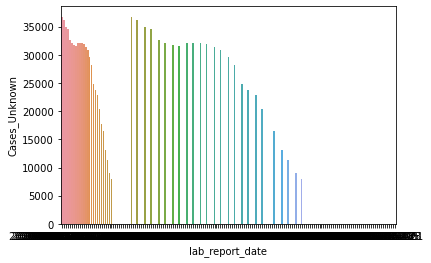

In [6]:
concatenated = pd.concat([case_by_race_df.assign(dataset='case_by_race_df'), case2_by_race_df.assign(dataset='case2_by_race_df')])
sns.barplot(x='lab_report_date', y='Cases_Unknown', data=concatenated)
plt.show()

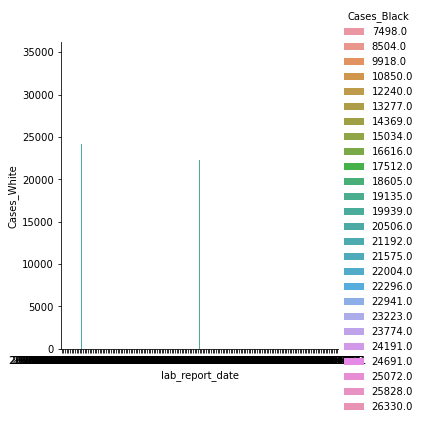

In [9]:
concatenated = pd.concat([case_by_race_df.assign(dataset='case_by_race_df'), case2_by_race_df.assign(dataset='case2_by_race_df')])
sns.catplot(x='lab_report_date', y='Cases_White', hue='Cases_Black', data=concatenated, kind='bar')
plt.show()